In [3]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("boston_housing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.head()
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')

In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [5]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
MEDV       float64
dtype: object

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df['chas'] = df['chas'].astype('category')


In [8]:
df.dtypes

crim        float64
zn          float64
indus       float64
chas       category
nox         float64
rm          float64
age         float64
dis         float64
rad           int64
tax           int64
ptratio     float64
b           float64
lstat       float64
MEDV        float64
dtype: object

In [11]:
df.duplicated().sum()
df = df.drop_duplicates()


In [12]:
df.describe()       # Numeric summary
df.describe(include='object')  # For categorical data


ValueError: No objects to concatenate

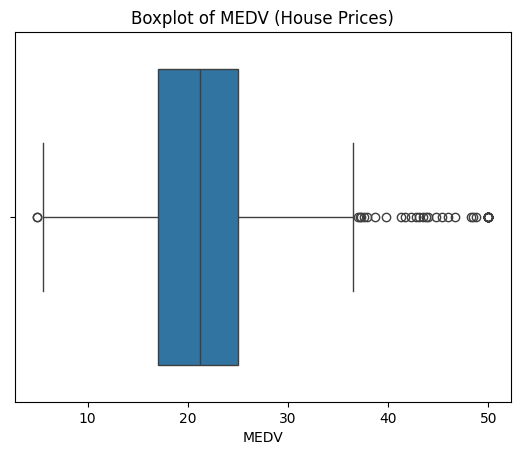

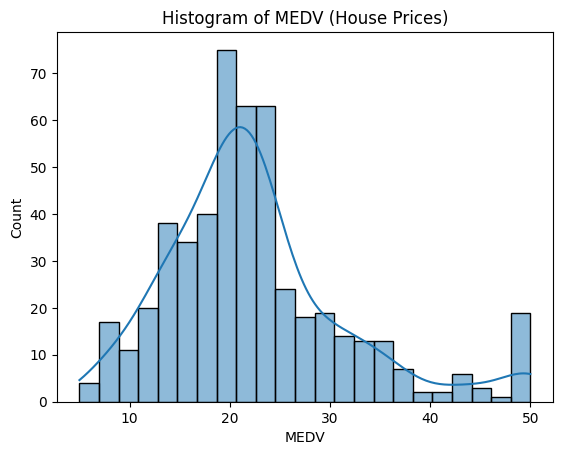

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of MEDV to identify outliers
sns.boxplot(x=df['MEDV'])
plt.title('Boxplot of MEDV (House Prices)')
plt.show()

# Histogram of MEDV to check distribution
sns.histplot(df['MEDV'], kde=True)
plt.title('Histogram of MEDV (House Prices)')
plt.show()


In [20]:
# Calculate IQR for MEDV
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in MEDV
df_cleaned = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]

print(f"Original size: {df.shape[0]}, After removing outliers: {df_cleaned.shape[0]}")


Original size: 506, After removing outliers: 466


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("MEDV", axis=1))
y = df["MEDV"].values
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1)  # Output layer
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


C:\Users\chaud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 656.5447 - mae: 23.4808 - val_loss: 520.4294 - val_mae: 21.2533
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 583.9830 - mae: 22.3208 - val_loss: 468.7906 - val_mae: 20.0474
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 532.1064 - mae: 21.0307 - val_loss: 393.8271 - val_mae: 18.1729
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 424.3777 - mae: 18.3937 - val_loss: 290.3230 - val_mae: 15.4097
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 291.8660 - mae: 14.8947 - val_loss: 180.2905 - val_mae: 11.8513
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 185.9124 - mae: 11.5488 - val_loss: 101.1740 - val_mae: 8.3200
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.3508 - mae: 8.6614 - val_loss: 71.7093 - val_mae: 6.8322
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90.9090 - mae: 7.8641 - val_loss: 60.7797 - val_mae: 6.1825
Epoch 9/100
21/21 ━━━━━

In [41]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")


4/4 - 0s - 12ms/step - loss: 13.8407 - mae: 2.4480
Mean Absolute Error on Test Set: 2.45


In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict
y_pred = model.predict(X_test).flatten()

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

# Additional metrics
print("MAE:", mean_absolute_error(y_test, y_pred)) 
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R² Score: 0.811
MAE: 2.4479712967779124
MSE: 13.84071899897749
RMSE: 3.7203116803538774


In [43]:
# Example new house (dummy values — replace with actual ones)
new_data = np.array([[0.1, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.90, 4.98]])

# Scale it using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Predict
predicted_price = model.predict(new_data_scaled).flatten()[0]
print(f"Predicted House Price: ${predicted_price * 1000:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted House Price: $25033.42


C:\Users\chaud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


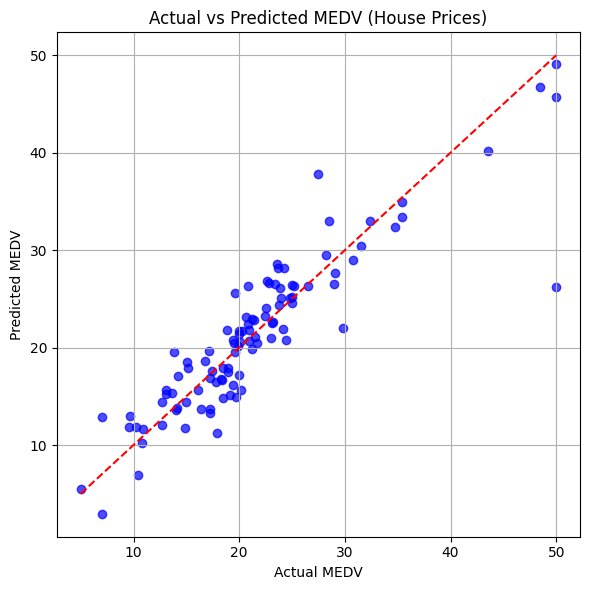

R² Score: 0.811


In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict on test set (or full set if needed)
y_pred = model.predict(X_test).flatten()

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (House Prices)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")


In [4]:
df=pd.read_csv("boston_housing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


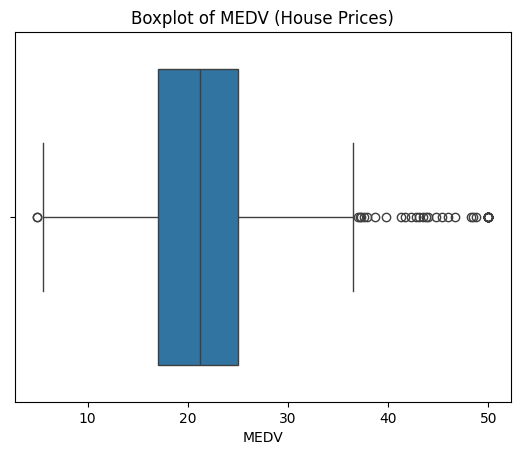

Text(0.5, 1.0, 'Histogram of MEDV (House Prices)')

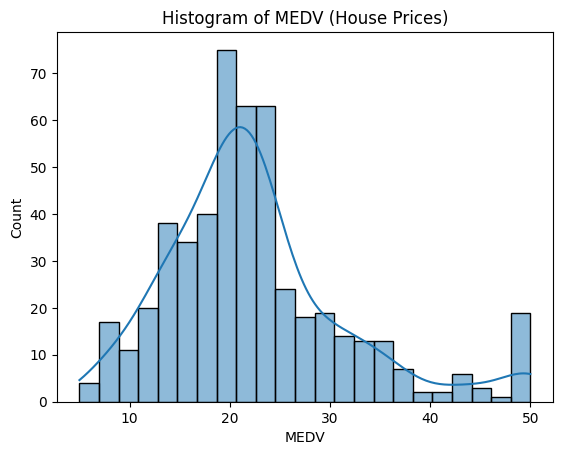

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of MEDV to identify outliers
sns.boxplot(x=df['MEDV'])
plt.title('Boxplot of MEDV (House Prices)')
plt.show()

# Histogram of MEDV to check distribution
sns.histplot(df['MEDV'], kde=True)
plt.title('Histogram of MEDV (House Prices)')
# plt.show()
